In [13]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = load_diabetes()

In [4]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
df_diabetes = pd.DataFrame(dataset.data,columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [6]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
# independent and dependent features
x = df_diabetes
y = dataset['target']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
# correlation
x_train.corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.136522,0.181976,0.308406,0.261534,0.200301,-0.023100,0.165340,0.270981,0.262201
sex,0.136522,1.000000,0.044746,0.165128,0.033717,0.128023,-0.344052,0.320619,0.121299,0.159936
bmi,0.181976,0.044746,1.000000,0.384534,0.246802,0.255519,-0.372335,0.431946,0.448657,0.394699
bp,0.308406,0.165128,0.384534,1.000000,0.242052,0.164355,-0.113747,0.209316,0.362476,0.376421
s1,0.261534,0.033717,0.246802,0.242052,1.000000,0.891476,0.044128,0.556987,0.528922,0.323666
s2,0.200301,0.128023,0.255519,0.164355,0.891476,1.000000,-0.190767,0.653120,0.307541,0.298647
s3,-0.023100,-0.344052,-0.372335,-0.113747,0.044128,-0.190767,1.000000,-0.732862,-0.388778,-0.304091
s4,0.165340,0.320619,0.431946,0.209316,0.556987,0.653120,-0.732862,1.000000,0.629707,0.441489
s5,0.270981,0.121299,0.448657,0.362476,0.528922,0.307541,-0.388778,0.629707,1.000000,0.464878
s6,0.262201,0.159936,0.394699,0.376421,0.323666,0.298647,-0.304091,0.441489,0.464878,1.000000


<Axes: >

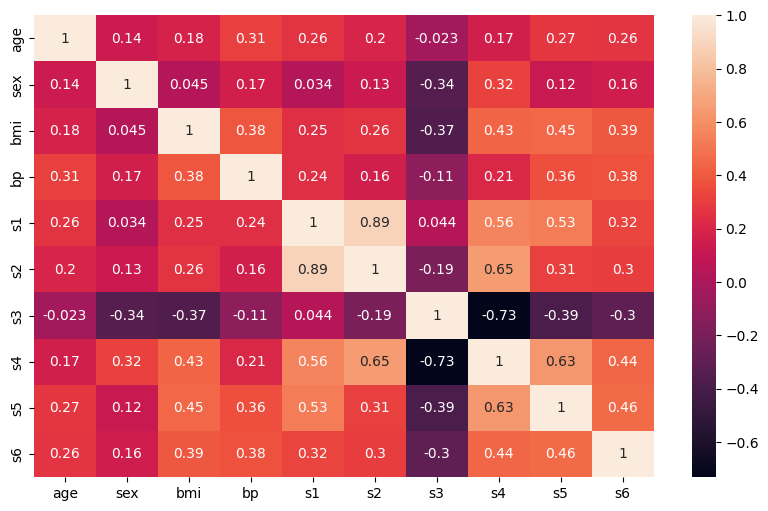

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(x_train.corr(),annot=True)

In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

regressor.fit(x_train,y_train)

DecisionTreeRegressor()

# hyperparameter tuning

In [16]:
param = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_features':['sqrt','log2','auto'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
}

In [17]:
from sklearn.model_selection import GridSearchCV

In [19]:
regressor = DecisionTreeRegressor()

In [20]:
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [21]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', 'auto'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [22]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 2,
 'max_features': 'log2',
 'splitter': 'best'}

In [23]:
y_pred = grid.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [25]:
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('R2:',r2_score(y_test,y_pred))

MAE: 44.5499124771984
MSE: 3273.78571767642
R2: 0.39355333892028577


In [26]:
selectmodel = DecisionTreeRegressor(criterion='friedman_mse',max_depth=2,max_features='log2',splitter='best')

In [27]:
selectmodel.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=2,
                      max_features='log2')

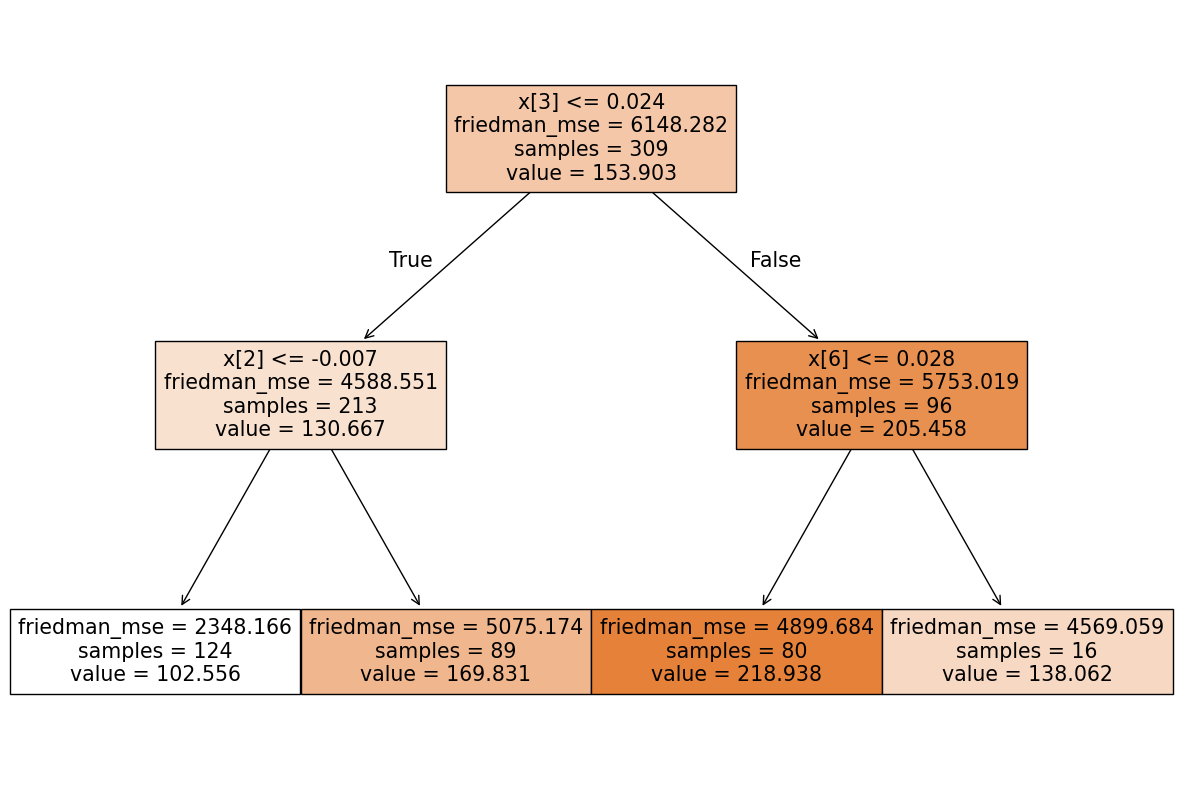

In [32]:
# visualization the tree

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)

plt.show()